In [29]:
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [30]:
current_directory = os.getcwd()

# Find the folder containing the participant data
# EMGfolder = os.path.join(os.getcwd(), "SN000\control_20240123161947\\")
# controlfolder = os.path.join(os.getcwd(), "SN000\control_20240123163044\\")

# EMGdata_raw = h5py.File(EMGfolder + 'data_raw.hdf5')
# EMGdata_process = h5py.File(EMGfolder + 'data_proc.hdf5')
# EMGtrials = pd.read_csv(EMGfolder + 'trials.csv')

# controldata_raw = h5py.File(controlfolder + 'data_raw.hdf5')
# controldata_process = h5py.File(controlfolder + 'data_proc.hdf5')
# controltrials = pd.read_csv(controlfolder + 'trials.csv')

# EMGtrials

In [31]:
# score = 'score'  
# soa = 'soa'
# trial = 'trial'
# noise = 'noise'

# plt.figure(figsize=(10, 6))
# plt.scatter(EMGtrials[noise], EMGtrials[soa])
# # plt.plot(EMGtrials[trial], EMGtrials[soa], label=soa)

# plt.title(f'{soa} vs {noise}')
# plt.xlabel(noise)
# plt.ylabel('Sense of Agency')
# plt.legend()
# plt.grid(True)
# plt.show()

In [32]:
# Read in training data
# data to read in: SN, BN
data = []

# participants
participants = ('SN001', 'SN002', 'SN003')

SN=0
for p in participants:
    SN = SN+1
    root_subject = os.path.join('data', p)
    control_folders = [f.path for f in os.scandir(root_subject) if f.is_dir() and f.name.startswith('control')]
    BN = 0
    for b in control_folders:
        fb = []
        # uncommnent if you read in everything
        BN = BN+1
        if os.path.isfile(os.path.join(b, 'trials.csv')):
            data_temp = pd.read_csv(os.path.join(b, 'trials.csv'),)
            data_temp.insert(0,'BN', BN)
            data_temp.insert(0,'SN',SN)
            # data_row = [SN, BN, data_temp]
            # data.append(data_row)
            data.append(data_temp)            # pd.concat([data, data_row])
            print(control_folders)

merged_df = pd.concat(data, ignore_index=True)                        
merged_df

['data\\SN001\\control_20240208102019', 'data\\SN001\\control_20240208102347', 'data\\SN001\\control_20240208102533', 'data\\SN001\\control_20240208102849', 'data\\SN001\\control_20240208103603', 'data\\SN001\\control_20240208104226', 'data\\SN001\\control_20240208104846']
['data\\SN001\\control_20240208102019', 'data\\SN001\\control_20240208102347', 'data\\SN001\\control_20240208102533', 'data\\SN001\\control_20240208102849', 'data\\SN001\\control_20240208103603', 'data\\SN001\\control_20240208104226', 'data\\SN001\\control_20240208104846']
['data\\SN001\\control_20240208102019', 'data\\SN001\\control_20240208102347', 'data\\SN001\\control_20240208102533', 'data\\SN001\\control_20240208102849', 'data\\SN001\\control_20240208103603', 'data\\SN001\\control_20240208104226', 'data\\SN001\\control_20240208104846']
['data\\SN001\\control_20240208102019', 'data\\SN001\\control_20240208102347', 'data\\SN001\\control_20240208102533', 'data\\SN001\\control_20240208102849', 'data\\SN001\\control

,SN,BN,noise,block,trial,emg,score,soa,sao
0,1,1,0.0,0,0,1,0.474175,NaN,NaN
1,1,1,0.0,0,1,1,0.551014,NaN,NaN
2,1,1,0.0,0,2,1,0.506689,NaN,NaN
3,1,1,0.0,0,3,1,0.575675,NaN,NaN
4,1,2,0.0,0,0,1,0.444715,NaN,NaN
...,...,...,...,...,...,...,...,...,...
267,3,7,0.1,0,15,0,0.940684,9.0,NaN
268,3,7,0.1,0,16,0,0.929729,8.0,NaN
269,3,7,0.3,0,17,0,0.849529,7.0,NaN
270,3,7,0.3,0,18,0,0.885559,8.0,NaN


In [33]:
# Need to merge into one data frame

# list_of_dataframes = []
# for folder_path in control_folders:
#     if os.path.isdir(folder_path):
#         file_path = os.path.join(folder_path, 'trials.csv')
#         if os.path.isfile(file_path):
#             print(file_path)
#             list_of_dataframes.append(pd.read_csv(file_path))

# merged_df = pd.concat(list_of_dataframes, ignore_index=True)
# merged_df

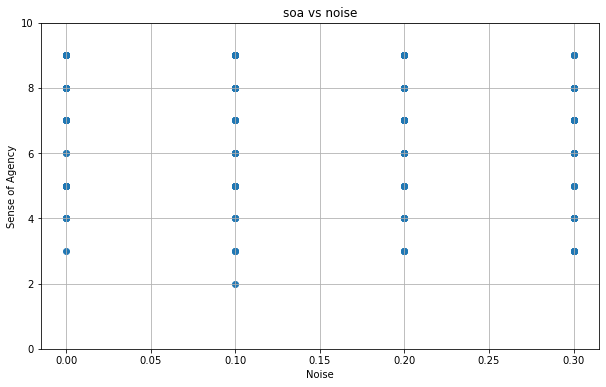

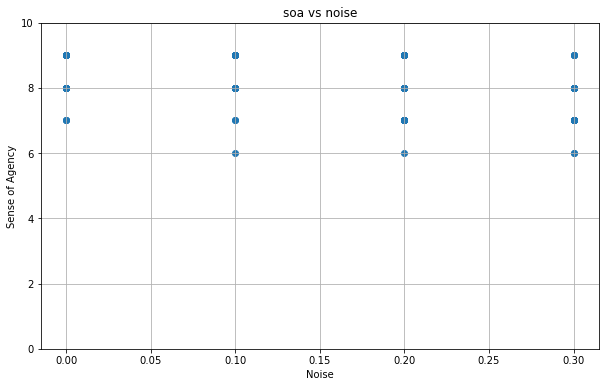

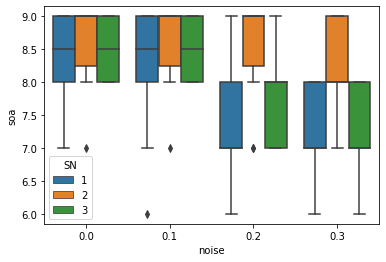

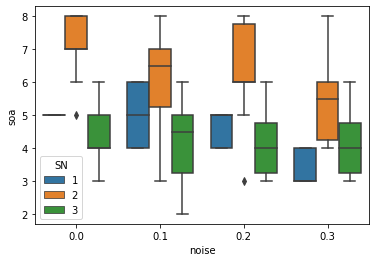

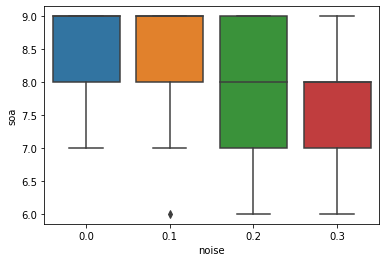

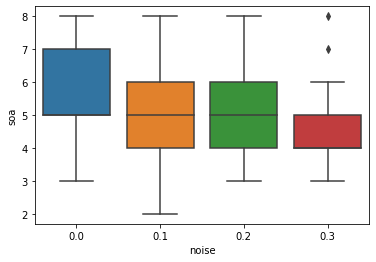

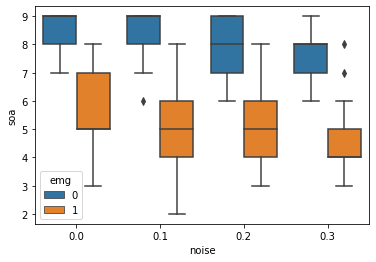

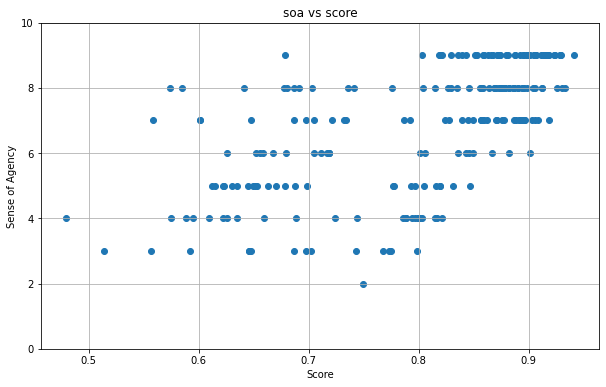

In [34]:
score = 'score'  
soa = 'soa'
trial = 'trial'
noise = 'noise'

plt.figure(figsize=(10, 6))
plt.scatter(merged_df[noise], merged_df[soa])

plt.title(f'{soa} vs {noise}')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))
# plt.legend()
# a, b = np.polyfit(merged_df[noise], merged_df[soa], 1)
# plt.plot(merged_df[noise], a*(merged_df[noise])+b) 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(merged_df[merged_df["emg"]==0][noise], merged_df[merged_df["emg"]==0][soa])

plt.title(f'{soa} vs {noise}')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))
# plt.legend()
# a, b = np.polyfit(merged_df[noise], merged_df[soa], 1)
# plt.plot(merged_df[noise], a*(merged_df[noise])+b) 
plt.grid(True)
plt.show()

plt.figure()
sns.boxplot(data=merged_df[merged_df["emg"]==0], x="noise", y="soa", hue="SN")

plt.figure()
sns.boxplot(data=merged_df[merged_df["emg"]==1], x="noise", y="soa", hue="SN")

plt.figure()
sns.boxplot(data=merged_df[merged_df["emg"]==0], x="noise", y="soa")

plt.figure()
sns.boxplot(data=merged_df[merged_df["emg"]==1], x="noise", y="soa")

plt.figure()
sns.boxplot(data=merged_df, x="noise", y="soa", hue="emg")

plt.figure(figsize=(10, 6))
plt.scatter(merged_df[score], merged_df[soa])
plt.title(f'{soa} vs {score}')
plt.xlabel('Score')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))
# plt.legend()
# a, b = np.polyfit(merged_df[score], merged_df[soa], 1)
# plt.plot(merged_df[score], a*(merged_df[score])+b)   
plt.grid(True)
plt.show()